In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.index.freq='MS'

In [4]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [5]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

### Train test split

- How do we decide how large the test data should be?
- There is no 100% correct answer here
- The size of test set is typically about 20% of the total sample, although this value depends on how long the sample is and how far ahead you want to forecast.
- The test set should ideally be at least as large as the maximum forecast horizon required.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [29]:
train_data = df.iloc[:109] # .loc[:'1950-01-01']
test_data = df[108:]

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul',seasonal_periods=12).fit()

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
test_predictions = fitted_model.forecast(36)

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [33]:
test_predictions

1958-02-01    339.142839
1958-03-01    399.281567
1958-04-01    394.233518
1958-05-01    402.545212
1958-06-01    473.128729
1958-07-01    521.795258
1958-08-01    514.513564
1958-09-01    446.216722
1958-10-01    385.430842
1958-11-01    339.645012
1958-12-01    381.455551
1959-01-01    401.210071
1959-02-01    387.159060
1959-03-01    455.812296
1959-04-01    450.049538
1959-05-01    459.538011
1959-06-01    540.114821
1959-07-01    595.671611
1959-08-01    587.358966
1959-09-01    509.392582
1959-10-01    440.000570
1959-11-01    387.732331
1959-12-01    435.462452
1960-01-01    458.013840
1960-02-01    441.973470
1960-03-01    520.346708
1960-04-01    513.768052
1960-05-01    524.599914
1960-06-01    616.584878
1960-07-01    680.007460
1960-08-01    670.517902
1960-09-01    581.512951
1960-10-01    502.296340
1960-11-01    442.627906
1960-12-01    497.115710
1961-01-01    522.859949
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

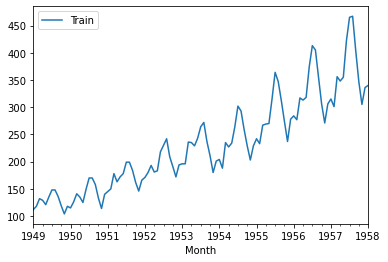

In [34]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')

<AxesSubplot:xlabel='Month'>

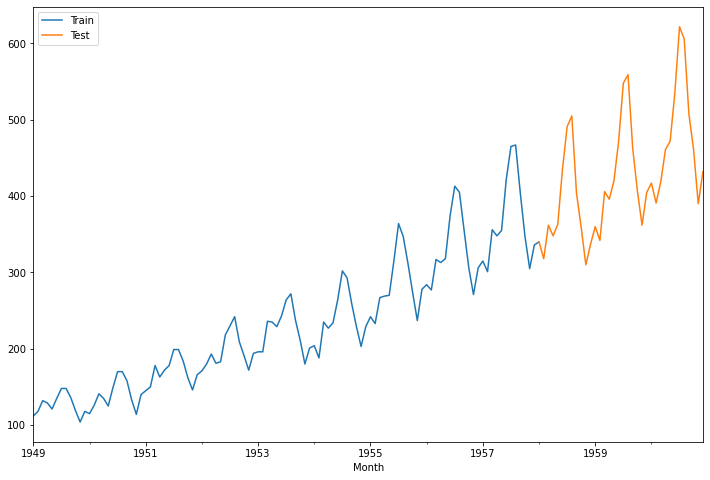

In [35]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')

<AxesSubplot:xlabel='Month'>

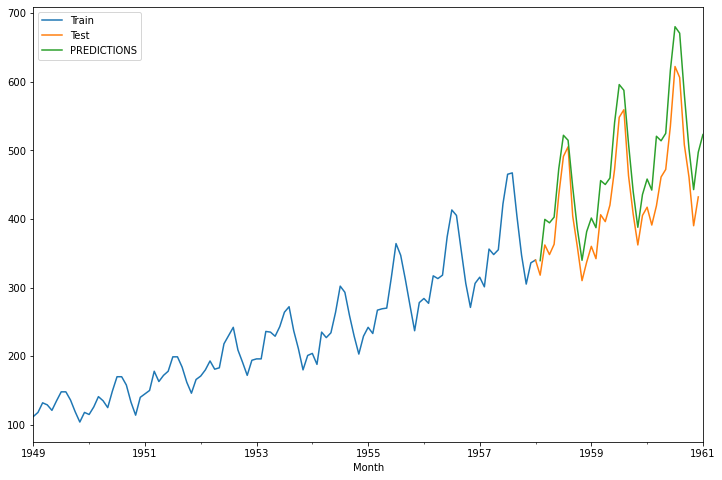

In [36]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='PREDICTIONS')

In [37]:
test_predictions.shape

(36,)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mean_absolute_error(test_data, test_predictions)

63.031111382769595

In [40]:
mean_squared_error(test_data, test_predictions)

5614.2515044341835

In [41]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92830909899264

In [42]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [43]:
forecast_predictions = final_model.forecast(36)

C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

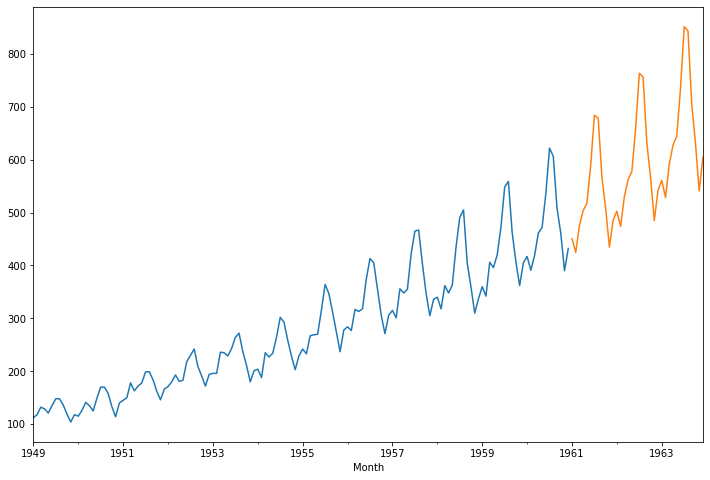

In [45]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [46]:
df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)

In [47]:
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

<AxesSubplot:>

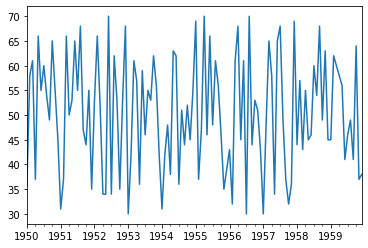

In [48]:
df2['a'].plot()

<AxesSubplot:>

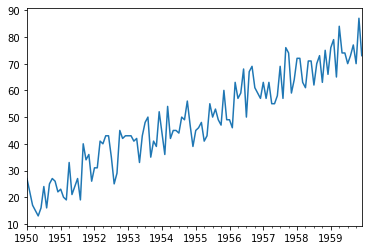

In [49]:
df2['b'].plot()

In [50]:
from statsmodels.tsa.statespace.tools import diff

In [51]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [52]:
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<AxesSubplot:>

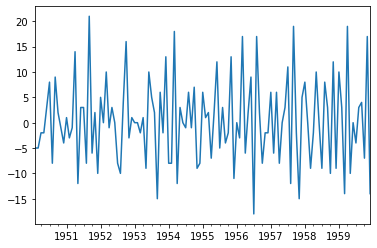

In [53]:
diff(df2['b'], k_diff=1).plot()

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='Month'>

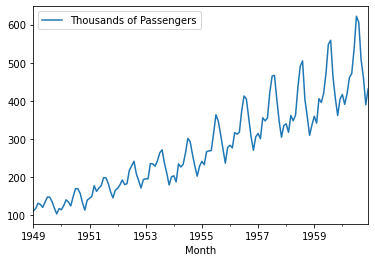

In [57]:
df.plot()

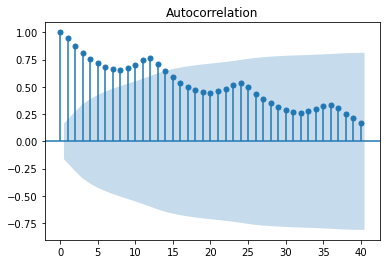

In [61]:
plot_acf(df, lags=40);  # Non-stationary data

ValueError: x is required to have ndim 1 but has ndim 2

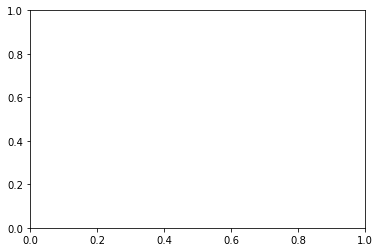

In [62]:
plot_acf(df2, lags=40)